# Чтение/Запись данных

Импорт необходимых библиотек

In [1]:
import polars as pl

## Чтение данных

В *Polars* существует множество встроенных методов для загрузки данных из различных источников. Благодаря своей скорости и простоте, *Polars* поддерживает работу с большинством популярных форматов.

Основные источники данных и соответствующие методы в *Polars*
1. **CSV** - `pl.read_csv()`
2. **EXCEL** - `pl.read_excel()`
3. **PARQUET** - `pl.read_parquet()`
4. **JSON** - `pl.read_json()`
5. **Pandas DataFrame** - `pl.from_pandas()`: Преобразование *Pandas DataFrame* в *Polars DataFrame*
6. **Database (SQL)** - `pl.read_database()`: Чтение SQL-запроса через *SQLAlchemy* (требует *SQLAlchemy* + драйвер БД)


**CSV**

Comma-Separated Values (CSV) - значения, разделенные запятыми. Это текстовый формат, предназначенный для представления табличных данных. Строка таблицы соответствует строке текста, которая содержит одно или несколько полей, разделенных запятыми. CSV является одним из наиболее популярных форматов для хранения табличных данных. Файл формата CSV имеет расширение `.csv`.

Для загрузки данных из CSV-файлов используем метод `read_csv()`, который имеет достаточно большое количество параметров. Основные из них:
- `source`: Путь к файлу, в данный параметр передаём путь к файлу.
- `has_header`: Является ли первая строка заголовками (по умолчанию True).
- `columns`: Список индексов или имён колонок, которые нужно выбрать из файла.
- `new_columns`: Переименование заголовков столбцов (после чтения файла).
- `separator`: Разделитель между значениями в строке (по умолчанию ',').
- `skip_rows`: Чтение csv файла после пропуска n строк (по умолчанию ничего не пропускаем).
- `schema`: Явно указанный тип данных для каждой колонки. Полезно, если хотим избежать автоматического определения типов.
- `null_values`: Значения, которые должны интерпретироваться как `null`.
- `ignore_errors`: При ошибке парсинга продолжить чтение следующих строк (по умолчанию False).
- `infer_schema`: Если True, *Polars* попытается автоматически определить типы данных по первым `infer_schema_length` строкам. Если False, все столбцы будут иметь тип `pl.String` По умолчанию(True).
- `infer_schema_length`: Число строк, используемых для определения схемы. Большее значение позволяет точнее определить типы (по умолчанию 100 строк).
- `batch_size`: Число строк, читаемых за один раз (по умолчанию 8192 строка).
- `encoding`: Кодировка файла (по умолчанию 'utf8').
- `row_index_name`: Добавить колонку с номером строки (индексом). Если задано, эта колонка будет первой.
- `row_index_offset`: Начальное значение индекса строк. Только если задан `row_index_nam` (По умолчанию с 0).

Загрузим датасет

In [2]:
# Наименование колонок
columns = ["id", "carat", "cut", "color", "clarity", "depth", "table", "price", "x", "y", "z"]

# Формируем df на основе csv-файла
df_from_csv = pl.read_csv(
    # Путь к файлу
    source="https://raw.githubusercontent.com/m-ardat/Library_Polars/main/dataset/diamonds.csv",
    # Нет заголовков
    has_header=False,
    # Пропустить первую строку
    skip_rows=1,
    # Залаем наименование колонок
    new_columns=columns
)

# Выводим первые 4 строки
print(df_from_csv.head(4))

shape: (4, 11)
┌─────┬───────┬─────────┬───────┬───┬───────┬──────┬──────┬──────┐
│ id  ┆ carat ┆ cut     ┆ color ┆ … ┆ price ┆ x    ┆ y    ┆ z    │
│ --- ┆ ---   ┆ ---     ┆ ---   ┆   ┆ ---   ┆ ---  ┆ ---  ┆ ---  │
│ i64 ┆ f64   ┆ str     ┆ str   ┆   ┆ i64   ┆ f64  ┆ f64  ┆ f64  │
╞═════╪═══════╪═════════╪═══════╪═══╪═══════╪══════╪══════╪══════╡
│ 1   ┆ 0.23  ┆ Ideal   ┆ E     ┆ … ┆ 326   ┆ 3.95 ┆ 3.98 ┆ 2.43 │
│ 2   ┆ 0.21  ┆ Premium ┆ E     ┆ … ┆ 326   ┆ 3.89 ┆ 3.84 ┆ 2.31 │
│ 3   ┆ 0.23  ┆ Good    ┆ E     ┆ … ┆ 327   ┆ 4.05 ┆ 4.07 ┆ 2.31 │
│ 4   ┆ 0.29  ┆ Premium ┆ I     ┆ … ┆ 334   ┆ 4.2  ┆ 4.23 ┆ 2.63 │
└─────┴───────┴─────────┴───────┴───┴───────┴──────┴──────┴──────┘


**EXCEL**

Excel (XLS/XLSX) — это бинарный формат электронных таблиц, разработанный Microsoft. Формат поддерживает хранение данных в виде таблиц, где информация организована по строкам и столбцам. В ячейках могут находиться числа, текст, формулы, даты, а также стили оформления (цвета, шрифты, границы) и другие элементы.
 - Формат XLS — устаревший формат на основе двоичной структуры, использовался в ранних версиях Excel.
 - Формат XLSX — современный формат, основанный на XML и ZIP-упаковке.
   
Файлы Excel имеют расширения:
- `.xls` — для старого формата
- `.xlsx` — для нового формата
  
Этот формат широко используется в бизнесе, аналитике, финансах и других сферах благодаря своей гибкости и поддержке множества возможностей форматирования и вычислений.

Для загрузки данных из Excel-файлов используем метод `read_excel()`, который имеет достаточно большое количество параметров. Основные из них:
- `source`: Путь к файлу, в данный параметр передаём путь к файлу.
- `sheet_id`: Номер(а) листа(ов), которые нужно прочитать.
-  `sheet_name`: Имя(а) листа(ов), которые нужно прочитать. Не может использоваться вместе с `sheet_id`!
- `engine`: Движок для парсинга файла (доступные варианты: 'calamine' (стоит по умолчанию, самый быстрый), 'openpyxl', 'xlsx2csv').
- `has_header`: Является ли первая строка заголовками (по умолчанию True).
- `columns`: Список имён или индексов колонок, которые нужно прочитать. Если не указано — читаются все колонки.
- `schema_overrides`: Переопределение типов данных для некоторых или всех колонок (передавать словарь вида {"Наименование колонки": Тип данных}.
- `infer_schema_length`: Число строк, используемых для определения схемы.
- `drop_empty_rows`: Удалять пустые строки при чтении (по умолчанию True).
- `drop_empty_cols`: Удалять пустые колонки (по умолчанию True).

**Важно**: чтобы пользоваться `read_excel()` необходимо установить пакет `fastexcel`.

Загрузим датасет

In [3]:
# Формируем df на основе csv-файла
df_from_excel = pl.read_excel(
    # Путь к файлу
    source="https://raw.githubusercontent.com/m-ardat/Library_Polars/main/dataset/lsg_stats_2025_q1.xlsx"
)

# Выводим первые 4 строки
print(df_from_excel.head(4))

shape: (4, 7)
┌──────────┬──────────┬──────────┬───────────┬─────────────────┬─────────────────┬─────────────────┐
│ City     ┆ Suburb   ┆ Sales 1Q ┆ Median 1Q ┆ Sales 1Q 2025   ┆ Median 1Q 2025  ┆ Median Change   │
│ ---      ┆ ---      ┆ 2024     ┆ 2024      ┆ ---             ┆ ---             ┆ ---             │
│ str      ┆ str      ┆ ---      ┆ ---       ┆ i64             ┆ i64             ┆ f64             │
│          ┆          ┆ i64      ┆ i64       ┆                 ┆                 ┆                 │
╞══════════╪══════════╪══════════╪═══════════╪═════════════════╪═════════════════╪═════════════════╡
│ ADELAIDE ┆ ADELAIDE ┆ 7        ┆ 1345000   ┆ 6               ┆ 1450000         ┆ 0.078067        │
│ ADELAIDE ┆ NORTH    ┆ 5        ┆ 1500000   ┆ 10              ┆ 2450000         ┆ 0.633333        │
│          ┆ ADELAIDE ┆          ┆           ┆                 ┆                 ┆                 │
│ ADELAIDE ┆ ALDGATE  ┆ 7        ┆ 1180000   ┆ 5               ┆ 1610500     

## Запись данных

В *Polars* есть множество методов для записи данных в различные форматы. Ниже приведён список основных методов с кратким описанием и примерами.

Основные методы сохранения (записи) *DataFrame* в *Polars*:
1. **CSV** - `df.write_csv()`: Сохраняет *DataFrame* в файл формата CSV
2. **EXCEL** - `df.write_excel()`: Сохраняет *DataFrame* в файл формата Excel
3. **Parquet** - `df.write_parquet()`: Сохраняет в бинарный формат Parquet (быстро и компактно)
4. **JSON** - `df.write_json()`: Сохраняет в JSON-файл (в разных режимах: массив, строки и т.д.)
5. **Pandas DataFrame** - `df.to_pandas()`: Преобразование в *Pandas DataFrame*
6. **Database (SQL)** - `df.write_database()`: Запись таблицы в БД

**CSV**

Метод `write_csv()` имеет множество параметров, основные из них:
- `file` - Наименование и путь, где должен храниться файл.
- `include_header` - Включать ли заголовки (названия столбцов) в выходной файл (по умолчанию True).
- `separator` - Символ, который будет использоваться как разделитель полей между значениями (по умолчанию ',').
- `batch_size` - Число строк, которые обрабатываются за один раз (по умолчанию 1024).
- `float_precision` - Количество знаков после запятой для вывода чисел с плавающей точкой.
- `null_value`: Строка, которая будет использоваться для представления null-значений (по умолчанию — пустая строка "").

Запись в csv

In [4]:
df_from_csv.write_csv(file="save_csv.csv")

**EXCEL**

Метод `write_excel()` из *polars* используется для записи *DataFrame* в Excel-файл с поддержкой форматирования через библиотеку *xlsxwriter*. 

Основные параметры данного метода:
- `workbook`: Наименование и путь, где должен храниться файл.
- `worksheet`: Имя листа. Если не указан, будет создан новый лист с именем "Sheet1".
-  `position`: Позиция, с которой начнётся запись таблицы. По умолчанию "A1".
- `table_style`: Стиль оформления таблицы.
- `table_name`: Имя таблицы в Excel. Это имя можно использовать в формулах и графиках.
- `column_formats`: Формат ячеек для конкретных столбцов. Форматы соответствуют Excel-форматам. Пример:`column_formats={"date": "dd/mm/yyyy","price":"0.00"}`
- `dtype_formats`: Форматы по типу данных. Например, все числа типа pl.Float64 будут отображаться с двумя знаками после запятой. `dtype_formats={pl.Float64: "0.00%", pl.Date: "yyyy-mm-dd"}`
- `conditional_formats`: Условное форматирование для указанных столбцов.
- `header_format`: Формат заголовка таблицы (шрифт, цвет и т.д.). `header_format={"bold": True, "font_color": "#702963"}`
- `column_widths`: Ширина колонок в пикселях. Можно указать:
  - общую ширину: 20
  - отдельно: {"name": 30, "age": 10}
- `formulas`: Добавление новых столбцов с формулами. Рекомендуется использовать структурированные ссылки. `formulas={"Total": "[@col1] + [@col2]"}`. При открытии в excel формула сохраняется.
- `float_precision`: Число знаков после запятой для значений с плавающей точкой. Не влияет на точность вычислений — только на отображение. По умолчанию 3 знака после запятой.
- `include_header`: Включать ли заголовок таблицы (по умолчанию True).
- `autofilter`: Включить фильтр (фильтрация по заголовкам). По умолчанию True.
- `autofit`: Автоматически подобрать ширину колонок по содержимому. По умолчанию False.
- `hidden_columns`: Скрыть указанные колонки
- `hide_gridlines`: Скрыть сетку (линии между ячейками) на листе. По умолчанию False.

Запись в excel

In [5]:
df_from_excel.head(2)

City,Suburb,Sales 1Q 2024,Median 1Q 2024,Sales 1Q 2025,Median 1Q 2025,Median Change
str,str,i64,i64,i64,i64,f64
"""ADELAIDE""","""ADELAIDE""",7,1345000,6,1450000,0.078067
"""ADELAIDE""","""NORTH ADELAIDE""",5,1500000,10,2450000,0.633333


In [6]:
df_from_excel.write_excel(
    # Наименование файла
    workbook="save_excel.xlsx",
    # Наименование листа
    worksheet="data",
    # Формат ячеек
    column_formats={
        "City": "str",
        "Suburb":"str",
        "Sales 1Q 2024":"#,##0",
        "Median 1Q 2024":"#,##0",
        "Sales 1Q 2025":"#,##0",
        "Median 1Q 2025":"#,##0"
    },
    # Формат для заголовков
    header_format={
        "bold": True,                    # Жирный
        "font_name": "Times New Roman",  # Шрифт
        "font_size": 12,                 # Размер шрифта
        "font_color": "#00008B",         # Темно-синий цвет текста (#00008B)
        "bg_color": "#FFFFFF"            # Белый цвет фона
    },
    # Создадим новый столбец на основании формулы
    formulas={"difference_sales": "[@Sales 1Q 2025] - [@Sales 1Q 2024]"},
    # Устанавливаем число знаков после запятой для значений с плавающей точкой
    float_precision = 2,
    # Автоматически подбираем ширину колонок
    autofit=True
)

В итоге получим файл следующего типа:
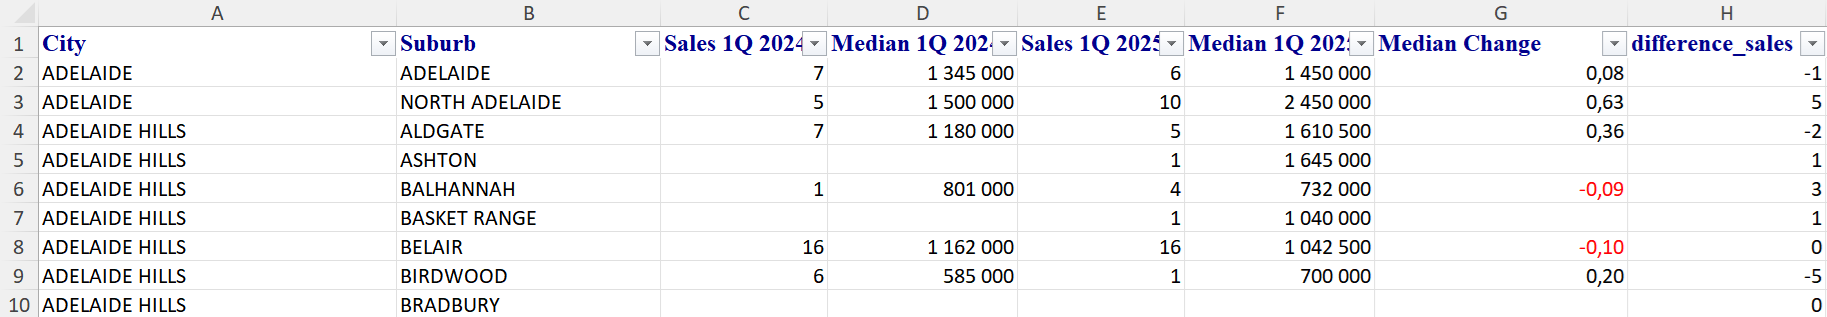